In [1]:
from trajectory_generator import TrajectoryGenerator
import numpy as np
import matplotlib.pyplot as plt
# py.offline.init_notebook_mode(connected=True)

In [4]:
# Berio Code
parameters = {"dt": 0.01, 
              "t_points": np.array([[0,0], [-50, 100], [100,70], [-40, 120]]).T,
              "delta": np.array([0.3, 0.3, 0.3]), 
              "Ac": np.array([0.05, 0.05, 0.05]),
              "delta_t": np.array([0.4, 0.4, 0.4]), 
              "T": 0.3}

# Letter G
# parameters = {"dt": 0.01,
#               "t_points": np.array([[0,0], [-100,100], [-200,-100], [-100,-300], [0,-100], [-100,-100]]).T,
#               "delta": np.array([0.4, 0.4, 0.4, 0.4, 0.4]), 
#               "Ac": np.array([0.05, 0.05, 0.05, 0.05, 0.05]),
#               "delta_t": np.array([0.3, 0.3, 0.3, 0.3, 0.7]), 
#               "T": 0.8}

# Fig 8. Djioua08EPM
#parameters = {"dt": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]).T, "delta": np.array([-0.5, 0.5]), "Ac": np.array([0.043949, 0.1082468]), "delta_t": np.array([0, 0]), "T": 0.4}
#parameters = {"dt": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]), "delta": [-0.5, 0.5], "Ac": [0.043949, 0.1082468], "delta_t": [0, 0], "T": [0.5, 0.2]}

t_points = parameters["t_points"]
trajectory_generator = TrajectoryGenerator(**parameters)
trajectory = trajectory_generator.generate_trajectory()
maxima = trajectory_generator.extract_strokes()

#print(trajectory)

print(maxima)

velocity = trajectory_generator.velocity()

[72.21044647]
[-34.97986029]
[-4.67686352e-02 -1.64756567e-01 -4.58271833e-01 -1.05882112e+00
 -2.11208062e+00 -3.74611941e+00 -6.04094794e+00 -9.00579629e+00
 -1.25686686e+01 -1.65819345e+01 -2.08416677e+01 -2.51049271e+01
 -2.90809795e+01 -3.23929868e+01 -3.45494036e+01 -3.49798603e+01
 -3.31503638e+01 -2.87132542e+01 -2.16222801e+01 -1.21650348e+01
 -9.07395504e-01  1.14212467e+01  2.40574793e+01  3.63020019e+01
  4.75523209e+01  5.72712540e+01  6.49396876e+01  7.00567026e+01
  7.22104465e+01  7.11855230e+01  6.70473035e+01  6.01608681e+01
  5.11377401e+01  4.07322009e+01  2.97213985e+01  1.88011178e+01
  8.51725124e+00 -7.61734189e-01 -8.83786296e+00 -1.56546755e+01
 -2.12589347e+01 -2.57626826e+01 -2.93112899e+01 -3.20596796e+01
 -3.41565964e+01 -3.57355854e+01 -3.69109538e+01 -3.77770689e+01
 -3.84096497e+01 -3.88680673e+01 -3.91979973e+01 -3.94340232e+01
 -3.96019794e+01 -3.97209433e+01]
(array([28]),)


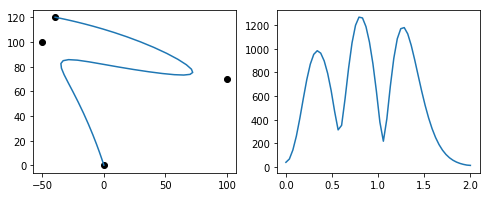

In [5]:
fig = plt.figure(figsize=(8,3))
plt.subplot(121)
plt.scatter(t_points[0,:], t_points[1,:], c='k')
plt.plot(trajectory[0,:], trajectory[1,:])
plt.subplot(122)
t = np.linspace(0, 2, trajectory.shape[1])
plt.plot(t, velocity)